Data Set URL:https://archive.ics.uci.edu/ml/datasets/iris

In [76]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


import seaborn as sns
sns.set(style="white", color_codes=True)

In [77]:
data_source="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
          -- Iris Setosa
          -- Iris Versicolour
          -- Iris Virginica


In [78]:
attributes = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

In [79]:
data = pd.read_csv(data_source,names=attributes)

In [80]:
df = pd.DataFrame(data,columns=attributes)

In [81]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [83]:
df.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Visualizations

References: https://www.kaggle.com/benhamner/python-data-visualizations

In [84]:
color = df.Class.map({'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000106F9358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018E5C080>]], dtype=object)

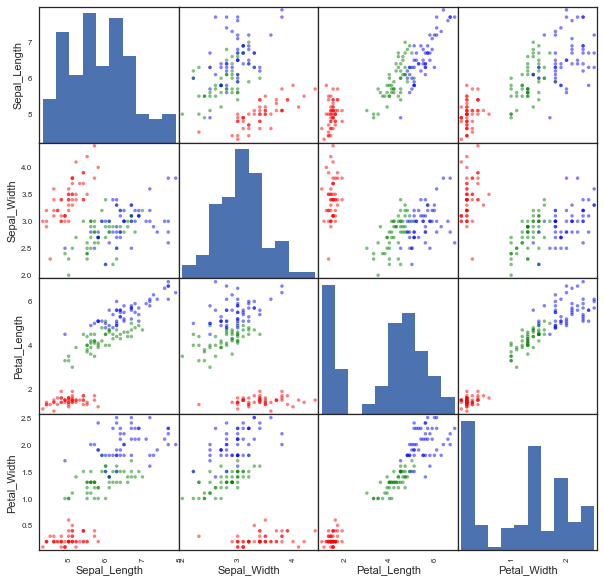

In [85]:
pd.plotting.scatter_matrix(df.drop('Class',axis=1), figsize=(10, 10), c=color)

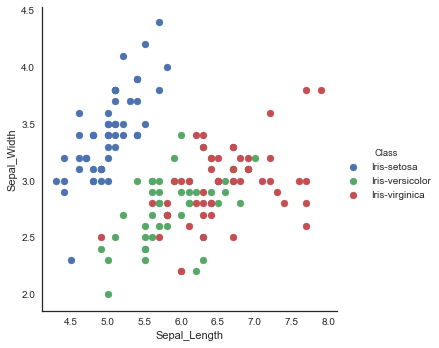

In [86]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend()

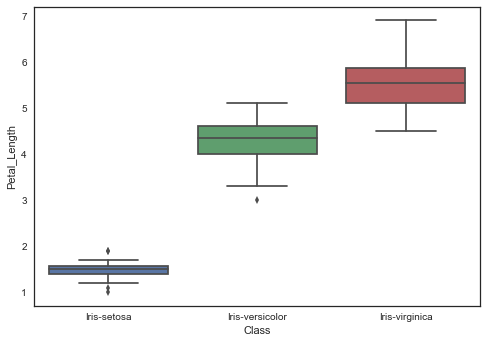

In [87]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Class", y="Petal_Length", data=df)

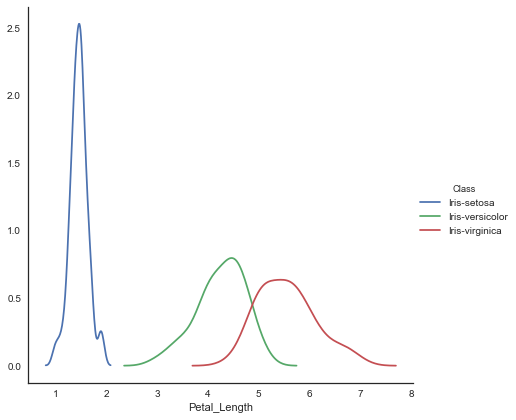

In [88]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df, hue="Class", size=6) \
   .map(sns.kdeplot, "Petal_Length") \
   .add_legend()

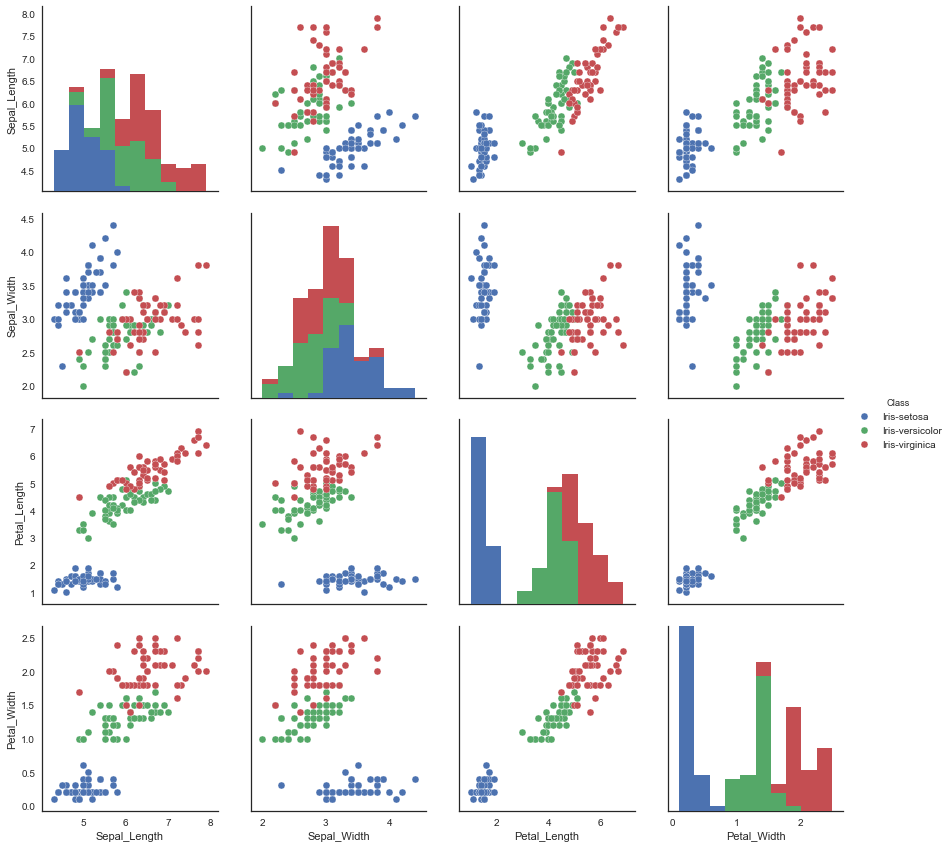

In [89]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df, hue="Class", size=3)

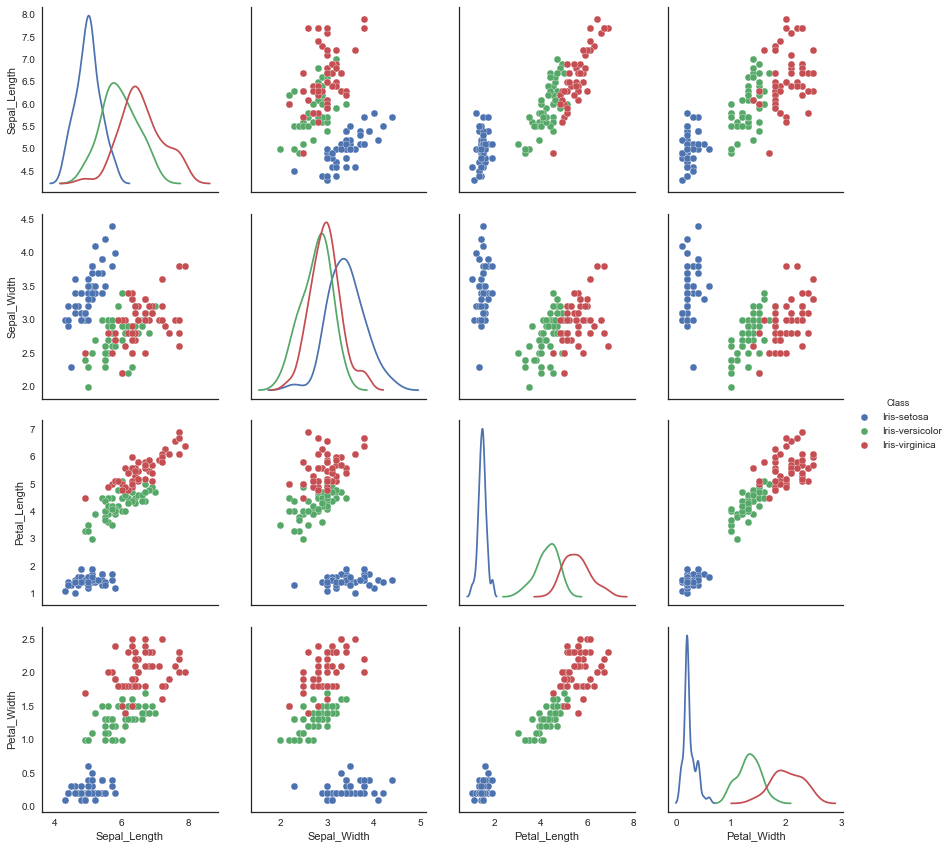

In [90]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df, hue="Class", size=3, diag_kind="kde")

In [91]:
c=df.Class

In [92]:
def Iris_Classify(row):
    if (row.Petal_Length > 0 and row.Petal_Length < 3) and (row.Petal_Width > 0.0 and row.Petal_Width < .8):
        return "Iris-setosa"
    elif (row.Petal_Length > 2.5 and row.Petal_Length < 5.5) and (row.Petal_Width > 0.8 and row.Petal_Width < 1.7):
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

In [93]:
c_hat = df.apply(Iris_Classify, axis = 1)

In [94]:
c_hat

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Length: 150, dtype: object

In [95]:
(c_hat != df.Class).sum()

4

In [96]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Iris-setosa,Iris-versicolor,Iris-virginica
Hypothesized Class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,2,48


In [97]:
#Misclassification rate
(c_hat !=c).mean()

0.026666666666666668

k-Nearest Neighbors(k-NN)

In [98]:
columns_X = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [99]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

In [100]:
#measure the precision of your prediction with .score()
model.score(X, c)

1.0

In [101]:
c_hat = model.predict(X)

In [102]:
#Misclassification rate
(c_hat != c).mean()

0.0

In [103]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Iris-setosa,Iris-versicolor,Iris-virginica
Hypothesized Class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,50,0
Iris-virginica,0,0,50


## Train/test sets

In [105]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [106]:
test_df = df.drop(train_df.index)

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset

In [121]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
train_X, test_X, train_c, test_c = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Build Models

references: http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN).
    Classification and Regression Trees (CART).
    Gaussian Naive Bayes (NB).
    Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our five models:

In [122]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [125]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_X, train_c, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## Select Best Model

We can see that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

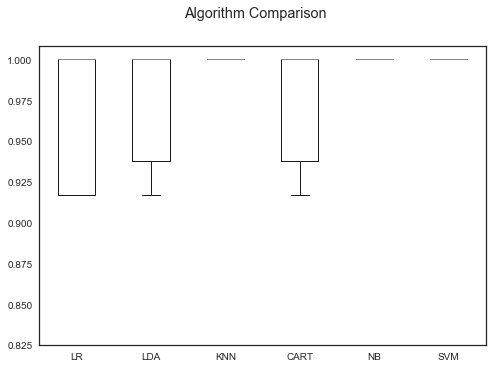

In [126]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

## Make Predictions

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [127]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(train_X, train_c)
predictions = knn.predict(test_X)
print(accuracy_score(test_c, predictions))
print(confusion_matrix(test_c, predictions))
print(classification_report(test_c, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

